# CIFAR-10 Dataset
https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from keras.datasets import cifar10

import os, glob
import PIL
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

import numpy as np

model = VGG16(weights='imagenet', include_top=False)

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [4]:
img_path = 'data/cat.jpg'
img = image.load_img(img_path, target_size=(32, 32, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x).flatten()

In [5]:
# print(features)
print(features.shape)

(512,)


In [6]:
(X_train, _), (X_test, _) = cifar10.load_data()
cifar_images = np.concatenate((X_train, X_test), axis=0)
print(len(cifar_images))

60000


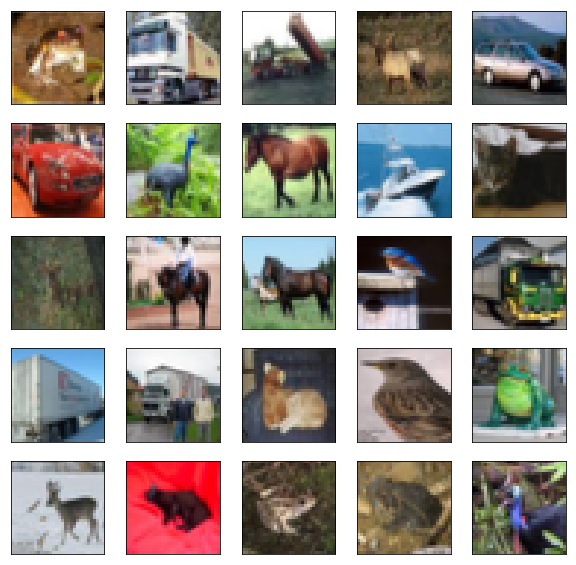

In [7]:
fig = plt.figure(figsize=(10,10))

for i in range(0,25):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(cifar_images[i,:].reshape(32, 32, 3))

plt.show()

In [8]:
# get features for all of CIFAR-10
features_list = []
for image_index in tqdm(range(len(cifar_images))):
    cifar_image = cifar_images[image_index,...]
    x = image.img_to_array(cifar_image)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x).flatten()
    features_list.append(features)

100%|██████████| 60000/60000 [3:53:17<00:00,  4.29it/s]     


In [ ]:
# print(features_list[1])
features_array = np.array(features_list)
print(features_array.shape)
nearest_neighbor_model = NearestNeighbors(10)
nearest_neighbor_model.fit(features_array)

In [ ]:
def get_similiar_images(img_path, cnn_model, knn_model, image_dataset):
    img = image.load_img(img_path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = cnn_model.predict(x).flatten()
    distances, indices = knn_model.kneighbors([features])
    similiar_images = []
    for s_i in indices[0]:
        print(s_i)
        similiar_images.append(image_dataset[s_i])
    return similiar_images

def plot_similiar_images(query_path, images):
    fig = plt.figure(figsize=(1, 1))
    query_image = image.load_img(img_path, target_size=(32, 32))
    plt.title("QUERY IMAGE")
    plt.imshow(query_image)
    fig = plt.figure(figsize=(3,3))
    plt.title("Similiar Images")
    for i in range(0, 9):
        sim_image = images[i]
        ax = fig.add_subplot(3, 3, i+1, xticks=[], yticks=[])
        ax.imshow(sim_image)

    plt.show()


In [ ]:
img_path = 'data/cat.jpg'
similiar_images = get_similiar_images(img_path, model, nearest_neighbor_model, cifar_images)
plot_similiar_images(img_path, similiar_images)

In [ ]:
img_path = 'data/bus.jpg'
similiar_images = get_similiar_images(img_path, model, nearest_neighbor_model, cifar_images)
plot_similiar_images(img_path, similiar_images)